# Treap Data Structure

The Treap (Tree + Heap) is a randomized binary search tree that combines the properties of a binary search tree and a heap. It maintains the binary search tree property with respect to the keys of the nodes and the heap property with respect to the priorities assigned to the nodes.

## Structure

A Treap is made up of nodes, each containing a key-value pair and a priority. The key follows the binary search tree property, where the keys in the left subtree are smaller than the key at the current node, and the keys in the right subtree are greater. The priorities are chosen randomly and follow the heap property, where the priority of a node is greater than or equal to the priorities of its children.

## Operations

### Insertion

To insert a new element into the Treap, we first perform a standard binary search tree insertion based on the key. After insertion, we maintain the heap property by performing rotations to ensure that the priorities are in the correct order.

### Deletion

Deleting an element from the Treap involves finding the node with the given key and removing it. After deletion, we ensure that the tree remains a valid Treap by performing rotations to maintain the heap property.

### Search

Searching for an element in the Treap is similar to searching in a binary search tree. We start at the root and recursively search the left or right subtree based on the comparison of the key with the current node's key.

## Advantages

- The Treap combines the advantages of both binary search trees and heaps, providing efficient search, insertion, and deletion operations.
- Its randomized nature helps in balancing the tree, resulting in better performance compared to deterministic binary search trees in certain scenarios.
- It is relatively simple to implement and does not require complex balancing algorithms.

## Applications

- Treaps are commonly used in scenarios where both search and priority-based operations are required, such as priority queues.
- They are also used in randomized algorithms and data structures, where the randomization properties of Treaps can be beneficial.


In [1]:
import random # To generate Random Numbers
import matplotlib.pyplot as plt #To plot the number of operations vs. input size


# Binary Search Tree (BST) Implementation

This code provides a Python implementation of a Binary Search Tree (BST) and related operations such as insertion, search, and counting operations.

## TreeNode Class

The `TreeNode` class represents a node in the binary search tree. Each node contains a key value (`val`) and references to its left and right children (`left` and `right`).

## BST Class

The `BST` class represents the Binary Search Tree data structure. It has the following methods:

### Constructor

- `__init__(self)`: Initializes an empty BST with a null root.

### Insertion

- `insert(self, root, key)`: Inserts a new node with the given key into the BST. If the root is null, it creates a new node with the key. Otherwise, it recursively inserts the key into the left subtree if it's less than the root's value or into the right subtree if it's greater.

### Search

- `search(self, root, key)`: Searches for a node with the given key in the BST. It returns the node if found, otherwise returns None.

### Count Operations

- `count_operations(self, root, key)`: Counts the number of operations required to find a node with the given key in the BST. It traverses the tree from the root to the target node, counting each operation performed.


In [2]:
class TreeNode:
    def __init__(self, key):
        self.val = key
        self.left = None
        self.right = None

class BST:
    def __init__(self):
        self.root = None

    def insert(self, root, key):
        if root is None:
            return TreeNode(key)
        else:
            if root.val < key:
                root.right = self.insert(root.right, key)
            else:
                root.left = self.insert(root.left, key)
        return root

    def search(self, root, key):
        if root is None or root.val == key:
            return root
        if root.val < key:
            return self.search(root.right, key)
        return self.search(root.left, key)

    def count_operations(self, root, key):
        count = 0
        while root:
            count += 1
            if root.val == key:
                return count
            elif root.val < key:
                root = root.right
            else:
                root = root.left
        return count


# Treap Data Structure Implementation

This code provides a Python implementation of a Treap data structure, which is a combination of a binary search tree (BST) and a heap.

## TreapNode Class

The `TreapNode` class represents a node in the Treap. Each node contains a key-value pair (`key` and `priority`) and references to its left and right children (`left` and `right`).

## Treap Class

The `Treap` class represents the Treap data structure. It has the following methods:

### Constructor

- `__init__(self)`: Initializes an empty Treap with a null root.

### Rotations

- `rotate_right(self, y)`: Performs a right rotation around the given node `y`.
- `rotate_left(self, x)`: Performs a left rotation around the given node `x`.

### Insertion

- `insert(self, root, key, priority)`: Inserts a new node with the given key and priority into the Treap. It maintains the heap property by performing rotations as necessary during insertion.

### Search

- `search(self, root, key)`: Searches for a node with the given key in the Treap. It returns the node if found, otherwise returns None.

### Count Search Operations

- `treap_search_operations(self, key)`: Counts the number of operations required to find a node with the given key in the Treap. It traverses the tree from the root to the target node, counting each operation performed.


In [3]:
class TreapNode:
    def __init__(self, key, priority):
        self.key = key
        self.priority = priority
        self.left = None
        self.right = None

class Treap:
    def __init__(self):
        self.root = None

    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        x.right = y
        return x

    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        y.left = x
        return y

    def insert(self, root, key, priority):
        if root is None:
            return TreapNode(key, priority)
        
        if key <= root.key:
            root.left = self.insert(root.left, key, priority)
            if root.left.priority > root.priority:
                root = self.rotate_right(root)
        else:
            root.right = self.insert(root.right, key, priority)
            if root.right.priority > root.priority:
                root = self.rotate_left(root)
        
        return root

    def search(self, root, key):
        if root is None or root.key == key:
            return root
        if key < root.key:
            return self.search(root.left, key)
        return self.search(root.right, key)
    def treap_search_operations(self, key):
        current = self.root
        count = 0
        while current:
            count += 1
            if current.key == key:
                return count
            elif key < current.key:
                current = current.left
            else:
                current = current.right
        return count







# BST Experiment Function

The `bst_experiment` function performs an experiment on a Binary Search Tree (BST). It takes two parameters: `size`, which represents the size of the tree, and `generate_tree_func`, a function that generates a BST with the given size. The function returns the average number of operations required to search for keys in the BST.

## Parameters:

- `size`: The size of the binary search tree.
- `generate_tree_func`: A function that generates a binary search tree with the given size and returns the BST instance and its root node.

## Explanation:

1. Initialize the total number of operations to 0.
2. Generate a binary search tree (`bst`) using the provided `generate_tree_func`.
3. Iterate over keys from 1 to `size`.
    - For each key, count the number of operations required to search for the key in the BST using the `count_operations` method.
    - Add the number of operations to the total operations.
4. Calculate the average number of operations by dividing the total operations by the size of the tree.
5. Return the average number of operations.


In [4]:
def bst_experiment(size, generate_tree_func):
    total_operations = 0
    bst, root = generate_tree_func(size)
    for key in range(1, size + 1):
        total_operations += bst.count_operations(root, key)
    average_operations = total_operations / size
    return average_operations


# Treap Experiment Function

The `treap_experiment` function performs an experiment on a Treap data structure. It takes one parameter: `size`, which represents the size of the Treap. The function returns the average number of operations required to search for keys in the Treap.

## Parameters:

- `size`: The size of the Treap.

## Explanation:

1. Initialize the total number of operations to 0.
2. Generate a Treap with the given size using the `generate_treap` function.
3. Iterate over keys from 1 to `size`.
    - For each key, count the number of operations required to search for the key in the Treap using the `treap_search_operations` method.
    - Add the number of operations to the total operations.
4. Calculate the average number of operations by dividing the total operations by the size of the Treap.
5. Return the average number of operations.


In [5]:
def treap_experiment(size):
    total_operations = 0
    treap = generate_treap(size)
    for key in range(1, size + 1):
        total_operations +=treap.treap_search_operations(key)
    average_operations = total_operations / size
    return average_operations

# Generation Functions for Binary Search Trees (BST) and Treaps

These functions generate binary search trees (BST) and Treaps for experimental analysis, considering both average and worst-case scenarios.

## Generate Average Case Binary Search Tree (BST)

The `generate_bst_average_case` function generates a binary search tree in the average-case scenario. It shuffles a list of keys from 1 to `size` and inserts them into the BST. This results in a balanced binary search tree where keys are randomly ordered. 

## Generate Worst Case Binary Search Tree (BST)

The `generate_bst_worst_case` function generates a binary search tree in the worst-case scenario. It inserts keys from 1 to `size` sequentially into the BST, resulting in an unbalanced tree where keys are ordered sequentially.

## Generate Worst Case Treap

The `generate_treap_worst_case` function generates a Treap in the worst-case scenario. It inserts keys from 1 to `size` sequentially into the Treap, using the key itself as the priority. This results in a Treap where the priorities are not randomized, potentially leading to performance issues in certain scenarios.

## Generate Treap

The `generate_treap` function generates a Treap for the average-case scenario. It inserts keys from 1 to `size` into the Treap with random priorities. This results in a balanced Treap where keys are inserted randomly with randomized priorities, ensuring better performance in most scenarios.

These generation functions allow for the creation of binary search trees and Treaps with varying characteristics, facilitating experimental analysis and performance evaluation.



In [6]:
def generate_bst_average_case(size):
    bst = BST()
    keys = list(range(1, size + 1))
    random.shuffle(keys)
    root = None
    for key in keys:
        root = bst.insert(root, key)
    return bst, root

def generate_bst_worst_case(size):
    bst = BST()
    root = None
    for key in range(1, size + 1):
        root = bst.insert(root, key)
    return bst, root

def generate_treap_worst_case(size):
    treap = Treap()
    for key in range(1, size + 1):
        treap.root = treap.insert(treap.root, key, random.randint(0, 100))  # Using key as priority
    return treap

def generate_treap(size):
    keys = list(range(1, size + 1))
    treap = Treap()
    for key in range(1, size + 1):
        treap.root = treap.insert(treap.root, key, random.randint(0, 100))  # Using key as priority
    return treap

# Experimental Analysis of Binary Search Trees (BST) vs. Treaps

In this code snippet, an experimental analysis is conducted to compare the performance of Binary Search Trees (BST) and Treaps under average and worst-case scenarios.

## Experiment Setup

- The experiment is conducted for tree sizes ranging from 1 to 100 (`max_size = 100`).
- Two sets of experiments are performed:
  1. Average case experiments: Trees are generated using average-case generation functions.
  2. Worst case experiments: Trees are generated using worst-case generation functions.

## Data Collection

- For each tree size, the average number of operations required for searching keys in both BST and Treap data structures is recorded.
- The `bst_experiment` and `treap_experiment` functions are used to conduct the experiments.

## Plot

- The plot visualizes the average number of operations against the size of the tree for both BST and Treap under average and worst-case scenarios.
- Four lines are plotted:
  1. BST (Average Case)
  2. Treap (Average Case)
  3. BST (Worst Case)
  4. Treap (Worst Case)

## Observations

- In the average case, both BST and Treap exhibit relatively similar performance, with the number of operations increasing gradually as the size of the tree grows.
- In the worst case, the performance of BST deteriorates significantly as the tree becomes unbalanced, leading to a sharp increase in the number of operations required for searching. On the other hand, Treap maintains relatively stable performance due to its randomized structure, resulting in a more consistent number of operations across different tree sizes.

This experimental analysis provides insights into the comparative performance of BST and Treap under different scenarios, aiding in the selection of appropriate data structures for various applications.


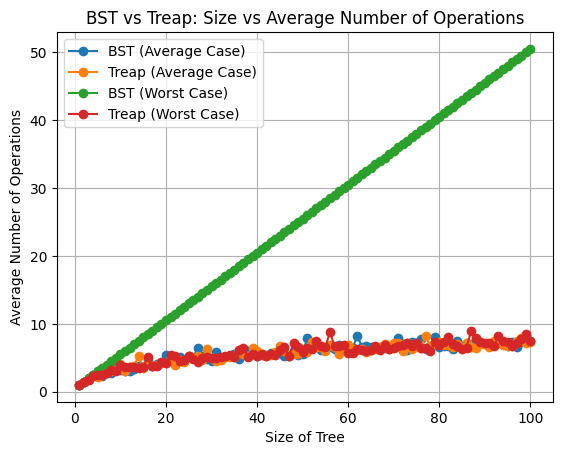

In [7]:
max_size = 100
sizes = list(range(1, max_size + 1))

# Average case experiments
bst_average_case_operations = [bst_experiment(size, generate_bst_average_case) for size in sizes]
treap_average_case_operations = [treap_experiment(size) for size in sizes]

# Worst case experiments
bst_worst_case_operations = [bst_experiment(size, generate_bst_worst_case) for size in sizes]
treap_worst_case_operations = [treap_experiment(size) for size in sizes]

plt.plot(sizes, bst_average_case_operations, label='BST (Average Case)', marker='o')
plt.plot(sizes, treap_average_case_operations, label='Treap (Average Case)', marker='o')
plt.plot(sizes, bst_worst_case_operations, label='BST (Worst Case)', marker='o')
plt.plot(sizes, treap_worst_case_operations, label='Treap (Worst Case)', marker='o')
plt.title('BST vs Treap: Size vs Average Number of Operations')
plt.xlabel('Size of Tree')
plt.ylabel('Average Number of Operations')
plt.legend()
plt.grid(True)
plt.show()


## References

[1] Seidel, R., & Aragon, C. R. (1996). Randomized search trees. Algorithmica, 16(4-5), 464-497.

[2] Goodrich, M. T., Tamassia, R., & Goldwasser, M. H. (n.d.). Data Structures and Algorithms in Python.
